###PROVA OTIMIZAÇÃO 18/10/23

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler

In [ ]:
df_treino = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/insurance_treino.csv', sep = ';', decimal = ',')

In [ ]:
df_treino.head(3)

,age,sex,bmi,children,smoker,region,charges
0,34,female,23.56,0,no,northeast,4992.3764
1,45,female,33.10,0,no,southwest,7345.0840
2,23,male,32.70,3,no,southwest,3591.4800


In [ ]:
df_treino.drop(['region', 'bmi'], axis = 1, inplace = True)

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   children  1000 non-null   int64  
 3   smoker    1000 non-null   object 
 4   charges   1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
df_treino.loc[df_treino['smoker'] == 'no', 'smoker'] = 0
df_treino.loc[df_treino['smoker'] == 'yes', 'smoker'] = 1
df_treino.loc[df_treino['sex'] == 'male', 'sex'] = 0
df_treino.loc[df_treino['sex'] == 'female', 'sex'] = 1

In [ ]:
df_treino['smoker'] = df_treino['smoker'].astype(int)
df_treino['sex'] = df_treino['sex'].astype(int)

##QUESTÃO 1

a) Matriz de entrada (X) para relacionar as variáveis de entrada com a variável de interesse (Y) por meio de uma matriz de parâmetros (β). O vetor de erros (ϵ) representa a diferença entre os valores reais e os valores previstos.

##QUESTÃO 2

a) Determinar os melhores valores dos coeficientes que descrevem o relacionamento entre as variáveis independentes (caracteristicas, o nosso x) e a variável dependente (target, o nosso y) no modelo

b) $i$. Solução analítica

In [ ]:
def matriz_x(coluna, dados):

    n_ = dados.shape[0]
    col_1 = np.ones(n_)
    col_var = dados[coluna]
    X_mat = np.c_[col_1, np.array(col_var)]

    return X_mat

In [ ]:
X_mat = matriz_x(coluna = ['age', 'sex', 'children', 'smoker'], dados = df_treino)
X_mat[:5]

array([[ 1., 34.,  1.,  0.,  0.],
       [ 1., 45.,  1.,  0.,  0.],
       [ 1., 23.,  0.,  3.,  0.],
       [ 1., 38.,  1.,  2.,  0.],
       [ 1., 32.,  1.,  2.,  0.]])

In [ ]:
y = df_treino['charges']
y[:5]

0    4992.3764
1    7345.0840
2    3591.4800
3    7133.9025
4    5152.1340
Name: charges, dtype: float64

In [ ]:
Xlx = X_mat.T @ X_mat
Xlx

array([[1.000000e+03, 3.920900e+04, 4.820000e+02, 1.096000e+03,
        2.020000e+02],
       [3.920900e+04, 1.735719e+06, 1.904800e+04, 4.364900e+04,
        7.721000e+03],
       [4.820000e+02, 1.904800e+04, 4.820000e+02, 5.250000e+02,
        8.200000e+01],
       [1.096000e+03, 4.364900e+04, 5.250000e+02, 2.622000e+03,
        2.280000e+02],
       [2.020000e+02, 7.721000e+03, 8.200000e+01, 2.280000e+02,
        2.020000e+02]])

$ii$. Gradiente descendente

In [ ]:
import numpy as np

dados = df_treino
n_ = dados.shape[0]

x1 = np.linspace(-5,5,n_)

y1 = 3 + x1 + np.random.normal(size=1000)

col_1 = np.ones(n_)
X_mat = np.column_stack((col_1, x1))

n_iter = 1000

In [ ]:
beta_ = list()
beta_.append(
    np.array([0,0])
)
lr = 0.01

In [ ]:
def grad_(X,B,Y):
  n = len(Y)
  grad = X.T @ (X @ B - Y) / n
  return grad

In [ ]:
for i in range(1,n_):
  gradiente = grad_(X=X_mat, B=beta_[i-1], Y=y1)
  beta_.append(
      beta_[i-1] - lr * gradiente
  )

In [ ]:
beta_[-1]

array([3.07654   , 0.99899013])

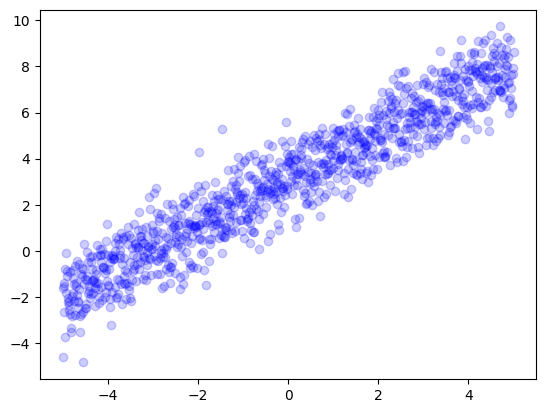

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x1,y1,'bo',alpha=0.2)

$iii$. Gradiente descendente

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()
regr.fit(df_treino[['age', 'sex','children','smoker']], df_treino['charges'])

LinearRegression()

In [ ]:
regr.intercept_, regr.coef_

(-3075.268382737546,
 array([  272.20653435,    57.34384981,   556.55795561, 23799.89105225]))

c)

In [ ]:
beta_[-1]

array([3.07654   , 0.99899013])

d)

In [ ]:
X_teste = matriz_x(coluna = ['age', 'sex', 'children', 'smoker'], dados = df_treino)

betas = [-3075.26838274, 272.20653435, 57.34384981, 556.55795561, 23799.89105225]

preditos = X_teste @ betas

erro = df_treino['charges'] - preditos

np.mean(erro ** 2)

37875141.04415237

##QUESTÂO 3

In [ ]:
"""
2x^2+5 = e^x
derivada da função = 4x-e^x

3.5 - ((2))
"""

In [ ]:
import math

def f(x):
    return 2*x**2 + 5 - math.exp(x)

def df(x):
    return 4*x - math.exp(x)

def newton_raphson(initial_guess, tolerance, max_iterations):
    x = initial_guess
    for i in range(max_iterations):
        x_next = x - f(x) / df(x)
        if abs(x_next - x) < tolerance:
            return x_next
        x = x_next
    return None

initial_guess = 3.5
tolerance = 1e-16  # Precisão de 16 casas decimais
max_iterations = 1000

result = newton_raphson(initial_guess, tolerance, max_iterations)

if result is not None:
    print(f"A raiz é aproximadamente {result:.16f}")
else:
    print("O método de Newton-Raphson não convergiu.")


A raiz é aproximadamente 3.2756010888473224


##QUESTÂO 4

In [ ]:
def updatex(x):
    return (2 - x**2)

In [ ]:
x_ = 16
count = 1

while x_ < -3 or x_ > 3:
    x_ -= updatex(x_)
    count += 1

print(round(x_, 8))
print(count)